# ep3 - parameterization per price pattern

The following code block loads the pre-defined functions and variables developed in ep1.

In [1]:
import pandas as pd
import datetime
import numpy as np
import time
import matplotlib.pyplot as plt
from my_stock import read_stock, buy_sig, sell_sig, proc_stock, paper_trade

One can use the code below to observe the variation in performance of a strategy as the parameters vary.  Note that the `paper_trade` function imported integrates a stop-loss feature and the %loss acceptance is defined by variable `sg`.  In the following code block, we again package functions such as `read_stock`,`proc_stock` and `paper_trade` into one function, i.e., `trade_single`.  We will try to use grid search find the maximal value of `trade_single` by varying parameters `win_dip` ($d$) and `win_ral` ($r$).

executed buy at 19.88 on 2019-10-31
executed sell at 20.66 on 2019-11-01
executed buy at 21.03 on 2019-12-30
executed sell at 21.52 on 2020-01-15
executed buy at 11.37 on 2020-04-15
executed sell at 12.00 on 2020-04-29
executed buy at 12.51 on 2020-06-11
executed sell at 13.14 on 2020-07-06
executed buy at 12.85 on 2020-07-20
executed sell at 13.41 on 2020-07-22
executed buy at 13.50 on 2020-07-30
executed sell at 15.53 on 2020-08-04
executed buy at 17.49 on 2020-08-21
executed sell at 18.50 on 2020-08-24
executed buy at 18.23 on 2020-08-31
executed sell at 19.26 on 2020-09-17
executed buy at 19.14 on 2020-10-16
executed sell at 18.15 on 2020-10-26


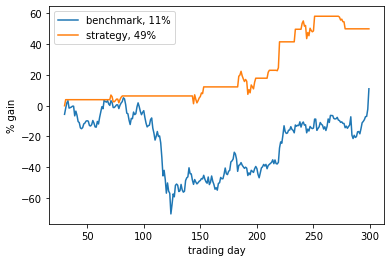

49

In [2]:
def trade_single(symbol,win_MA,win_dip,win_ral,show_steps,show_plot):
    df = read_stock(symbol)
    df = proc_stock(df,win_MA,win_dip,win_ral)
    benchmark_gain,strategy_gain = paper_trade(df,1000000,5,show_steps,show_plot)
    return strategy_gain

trade_single('MOS',20,6,10,True,True)

We will explore the following grid: $d=[2,10]\times r=[2,10]$

In [3]:
d = range(2,11)
r = range(2,11)
grid = [[di,ri] for di in d for ri in r]
df_grid = pd.DataFrame(grid,columns=['d','r'])
df_grid

symbol='MOS'
win_MA = 20

def trade_single_row(row):
    return trade_single(symbol,win_MA,row['d'],row['r'],False,False)

t_0 = time.time()
df_grid['Strategy Gain %'] = df_grid.apply(trade_single_row,axis=1)
t_f = time.time()
print('grid search took',t_f-t_0,'seconds')
df_grid.head(10)

grid search took 104.67998552322388 seconds


,d,r,Strategy Gain %
0,2,2,8
1,2,3,1
2,2,4,13
3,2,5,25
4,2,6,18
...,...,...,...
76,10,6,2
77,10,7,2
78,10,8,2
79,10,9,3


In [4]:
df_grid.dropna(inplace=True)
df_grid.sort_values(by=['Strategy Gain %'],ascending=False).head(10)

,d,r,Strategy Gain %
44,6,10,49
35,5,10,44
43,6,9,44
42,6,8,43
40,6,6,40
41,6,7,40
34,5,9,39
33,5,8,38
53,7,10,37
39,6,5,37


It is also known that vectorization improves the performance of the code.  I am interested in confirming the performance improvement by vectorization.  In order to do so, I conduct the same computational task through embedded for loops.

In [6]:
d = range(2,11)
r = range(2,11)

symbol='MOS'
win_MA = 20

res = []

t_0 = time.time()
for di in d:
    for ri in r:
        res.append(trade_single(symbol,win_MA,di,ri,False,False))
t_f = time.time()
print('grid search by embedded loops took',t_f-t_0,'seconds')

grid search by embedded loops took 106.08906626701355 seconds


The grid search produced $(d,r)=(6,10)$, which gives the maximaized strategy gain %.  Interestingly, the grid search by loop does not appear to be significantly slower than grid search implemented w/ vectorization.  I was also interested in applying this optimized strategy to a 'hypothetical' price trend that is in reverse-chronological order as the actual price trend.  That is to say the price goes backwards in time.

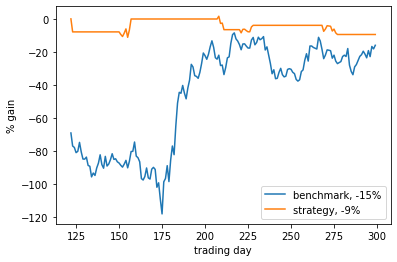

In [7]:
win_MA = 20
win_dip = 6
win_ral = 10
symbol = 'MOS'
df = read_stock(symbol)
df = df.iloc[::-1]
df = df.reset_index()
df = df.drop(columns=['index'])
df = proc_stock(df,win_MA,win_dip,win_ral)
benchmark_gain,strategy_gain = paper_trade(df,1000000,5,False,True)